In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Show dataset description
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Convert to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (house prices)
df["Target"] = data.target

# Display first 5 rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


# **TASK1: Data Exploration & Preprocessing**







In [ ]:
# Check the shape of the dataset (number of rows & columns)
print(f"Dataset Shape: {df.shape}")
print()

# Check column names and data types
print(df.info())
print()

# Check for missing values
print(df.isnull().sum())  # No missing values in this dataset
print()

# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")


Dataset Shape: (20640, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

Duplicate Rows: 0


In [ ]:
# Display basic statistics of numerical features
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

df.describe() gives summary statistics like:

*   Mean, Min, Max, Std Deviation for each feature.

*   Helps detect outliers and skewed distributions.


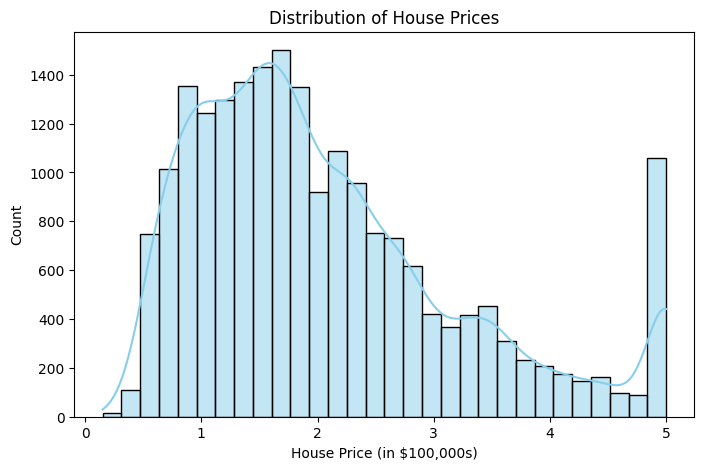

In [ ]:
# Plot the distribution of house prices (Target Variable)
plt.figure(figsize=(8,5))
sns.histplot(df["Target"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.xlabel("House Price (in $100,000s)")
plt.ylabel("Count")
plt.show()


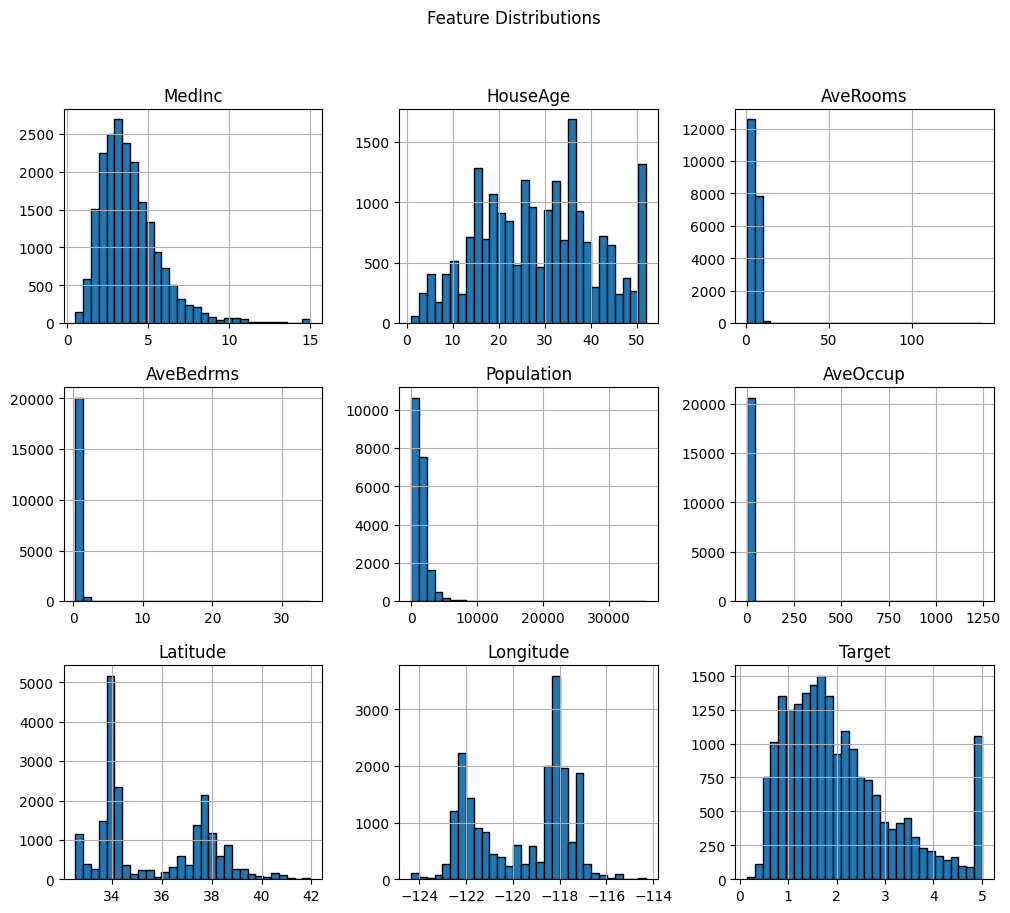

In [ ]:
# Plot histograms for all features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


Scattered plot between Traget value (Houseprice) & different features

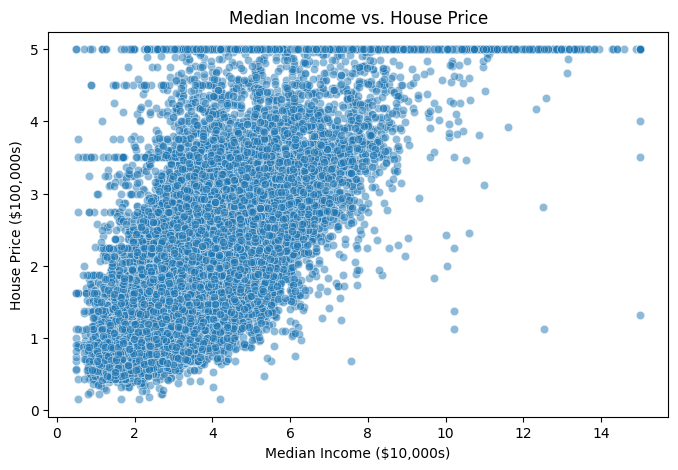

In [ ]:
# Scatter plot: Median Income vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["MedInc"], y=df["Target"], alpha=0.5)
plt.title("Median Income vs. House Price")
plt.xlabel("Median Income ($10,000s)")
plt.ylabel("House Price ($100,000s)")
plt.show()


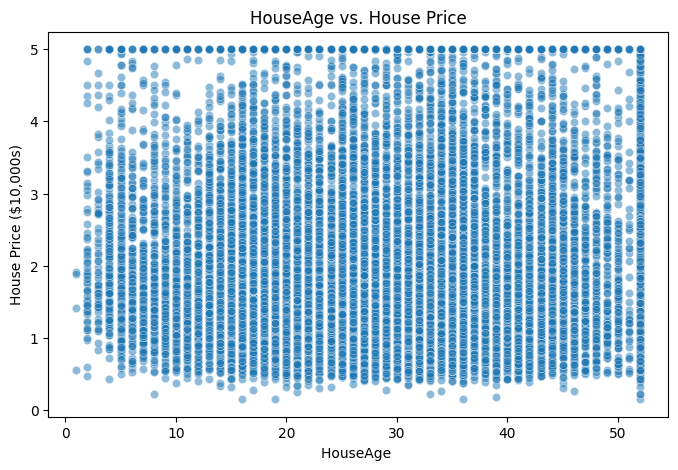

In [ ]:
# Scatter plot: HouseAge vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["HouseAge"], y=df["Target"], alpha=0.5)
plt.title("HouseAge vs. House Price")
plt.xlabel("HouseAge ")
plt.ylabel("House Price ($10,000s)")
plt.show()


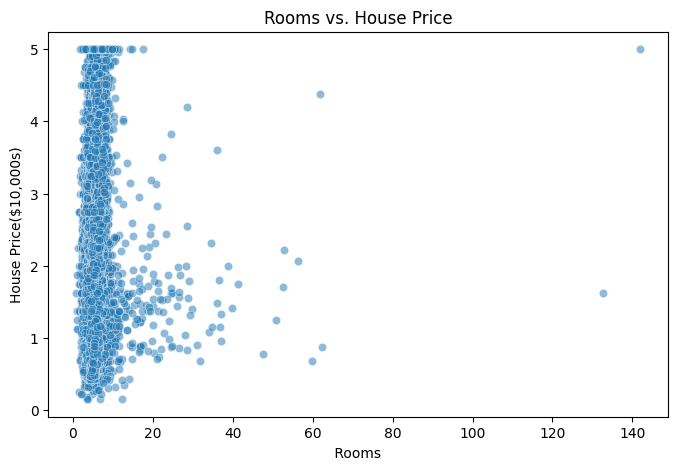

In [ ]:
# Scatter plot: Average Rooms vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["AveRooms"], y=df["Target"], alpha=0.5)
plt.title("Rooms vs. House Price")
plt.xlabel(" Rooms ")
plt.ylabel("House Price($10,000s)")
plt.show()


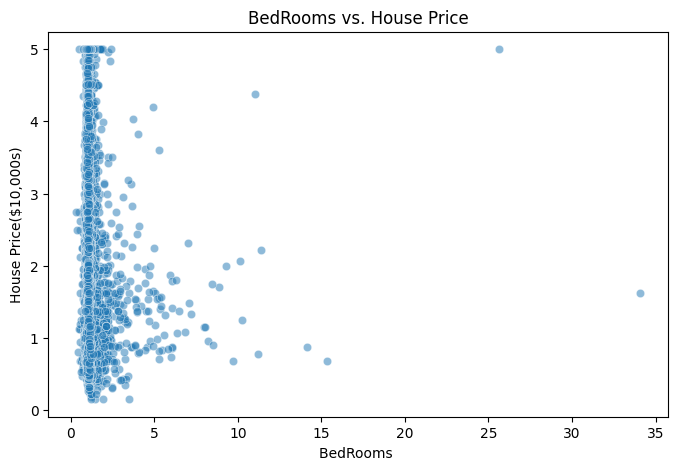

In [ ]:
# Scatter plot: Average Bedrooms vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["AveBedrms"], y=df["Target"], alpha=0.5)
plt.title("BedRooms vs. House Price")
plt.xlabel("BedRooms ")
plt.ylabel("House Price($10,000s)")
plt.show()


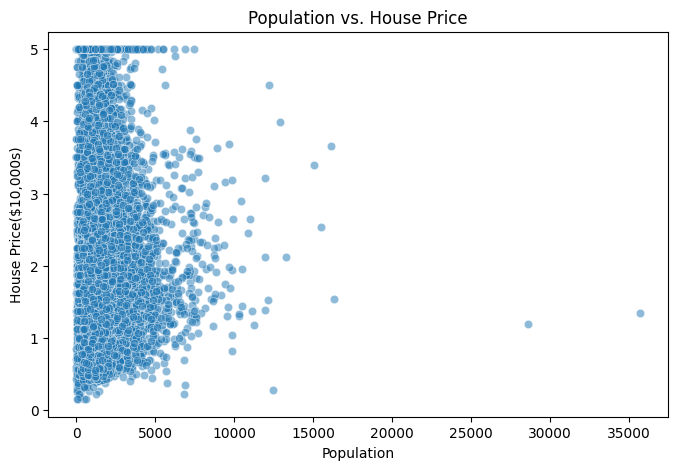

In [ ]:
# Scatter plot: Population vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Population"], y=df["Target"], alpha=0.5)
plt.title("Population vs. House Price")
plt.xlabel("Population")
plt.ylabel("House Price($10,000s)")
plt.show()


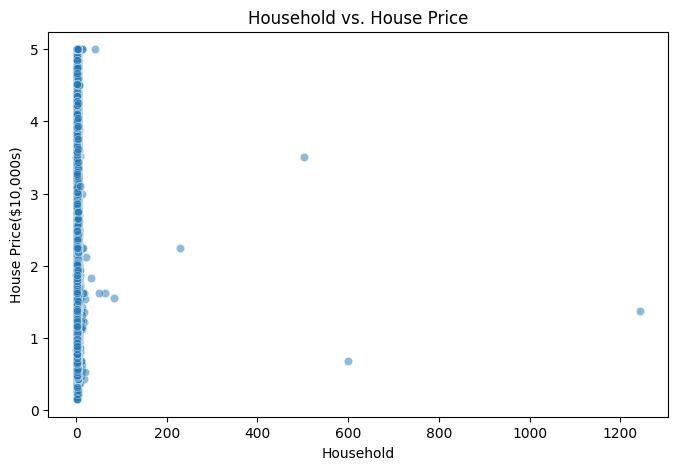

In [ ]:
# Scatter plot: Households vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["AveOccup"], y=df["Target"], alpha=0.5)
plt.title("Household vs. House Price")
plt.xlabel("Household")
plt.ylabel("House Price($10,000s)")
plt.show()


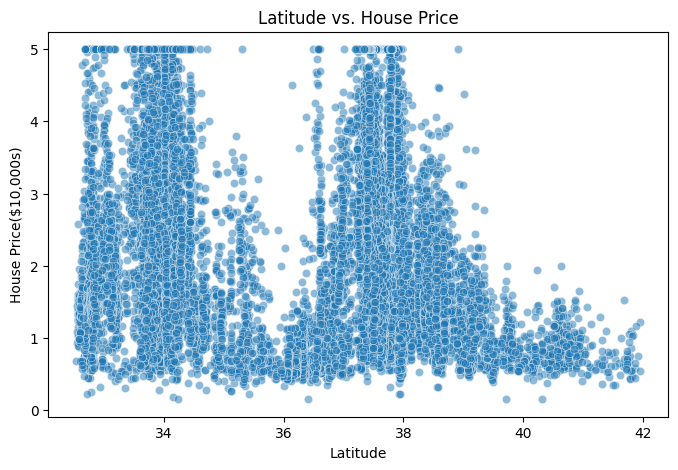

In [ ]:
# Scatter plot: Latitued vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Latitude"], y=df["Target"], alpha=0.5)
plt.title("Latitude vs. House Price")
plt.xlabel("Latitude")
plt.ylabel("House Price($10,000s)")
plt.show()


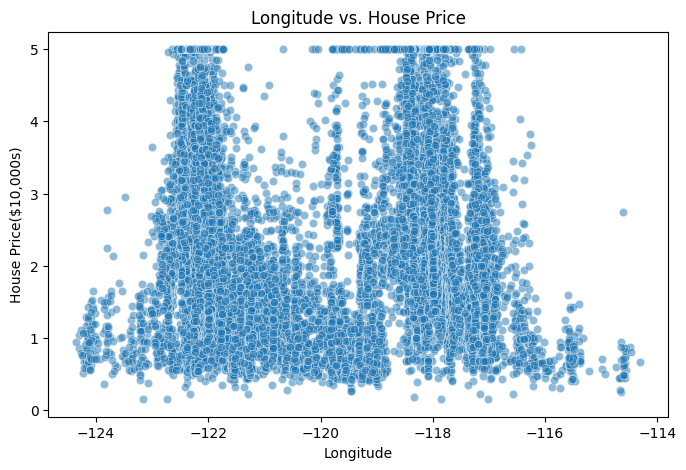

In [ ]:
# Scatter plot: Longitude vs House Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Longitude"], y=df["Target"], alpha=0.5)
plt.title("Longitude vs. House Price")
plt.xlabel("Longitude")
plt.ylabel("House Price($10,000s)")
plt.show()


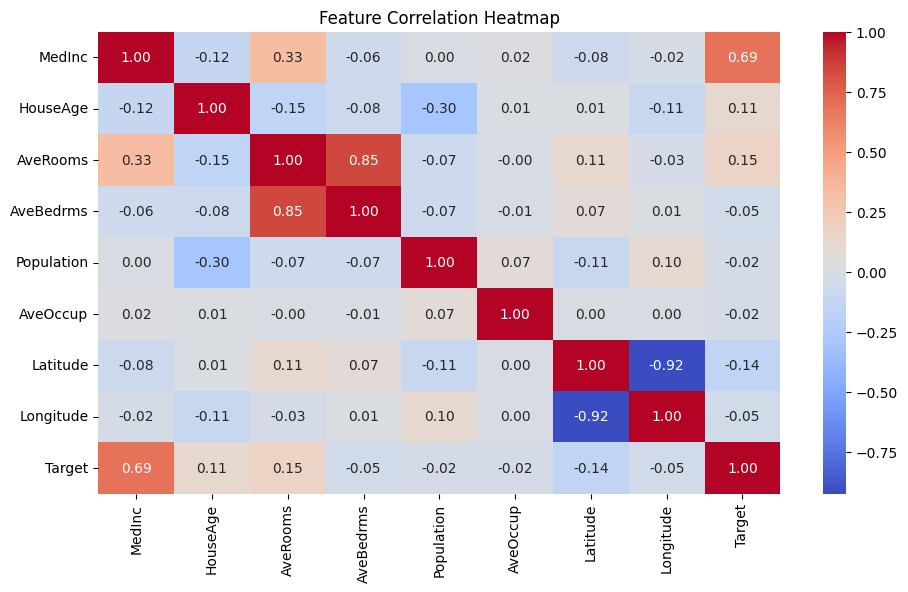

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(11,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Get correlation values for the target variable
target_correlation = correlation_matrix["Target"].drop("Target")
# Define a threshold for strong correlation (e.g., abs(correlation) > 0.5)
threshold = 0.5

# Select positively and negatively correlated features
strong_positive = target_correlation[target_correlation > threshold]
strong_negative = target_correlation[target_correlation < -threshold]

print("Strongly Positively Correlated Features:\n", strong_positive)
print("\nStrongly Negatively Correlated Features:\n", strong_negative)

Strongly Positively Correlated Features:
 MedInc    0.688075
Name: Target, dtype: float64

Strongly Negatively Correlated Features:
 Series([], Name: Target, dtype: float64)


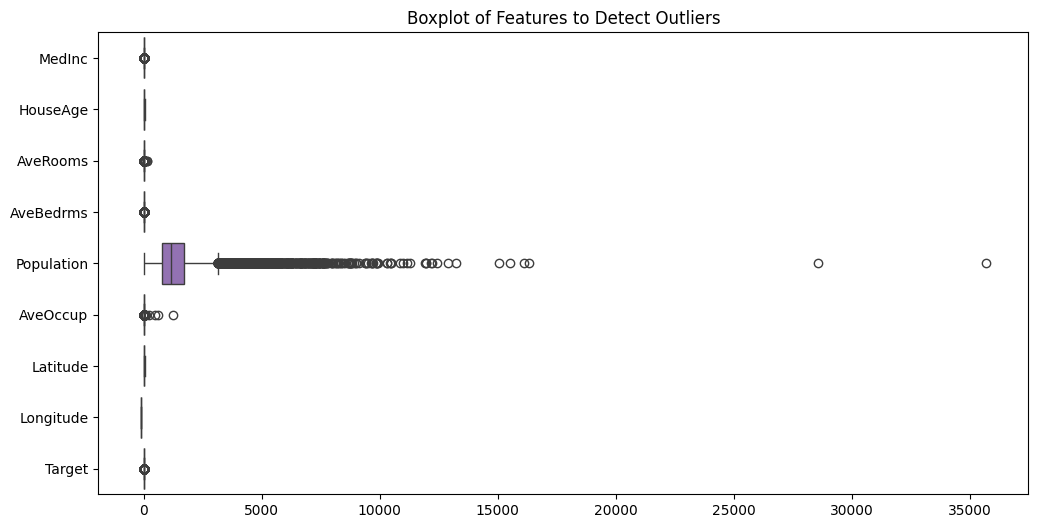

In [ ]:
# Plot box plots for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features to Detect Outliers")
plt.show()


# TASK 2 Regression Analysis

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Regression without feature scaling


OLS Regression Coefficients:
 [-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]

Linear Regression Coefficients:
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

Ridge Regression Coefficients:
 [ 4.47068597e-01  9.74130199e-03 -1.20293353e-01  7.66201258e-01
 -1.99135324e-06 -3.52184780e-03 -4.19720067e-01 -4.33421866e-01]

Lasso Regression Coefficients:
 [ 4.44698243e-01  9.78271615e-03 -1.15737191e-01  7.41172257e-01
 -1.85738492e-06 -3.50964130e-03 -4.18521643e-01 -4.31828076e-01]
OLS Regression R^2 score: 0.5758
OLS Regression MSE: 0.5559

Linear Regression R^2 score: 0.5758
Linear Regression MSE: 0.5559

Ridge Regression R^2 score: 0.5764
Ridge Regression MSE: 0.5550

Lasso Regression R^2 score: 0.5773
Lasso Regression MSE: 0.5539



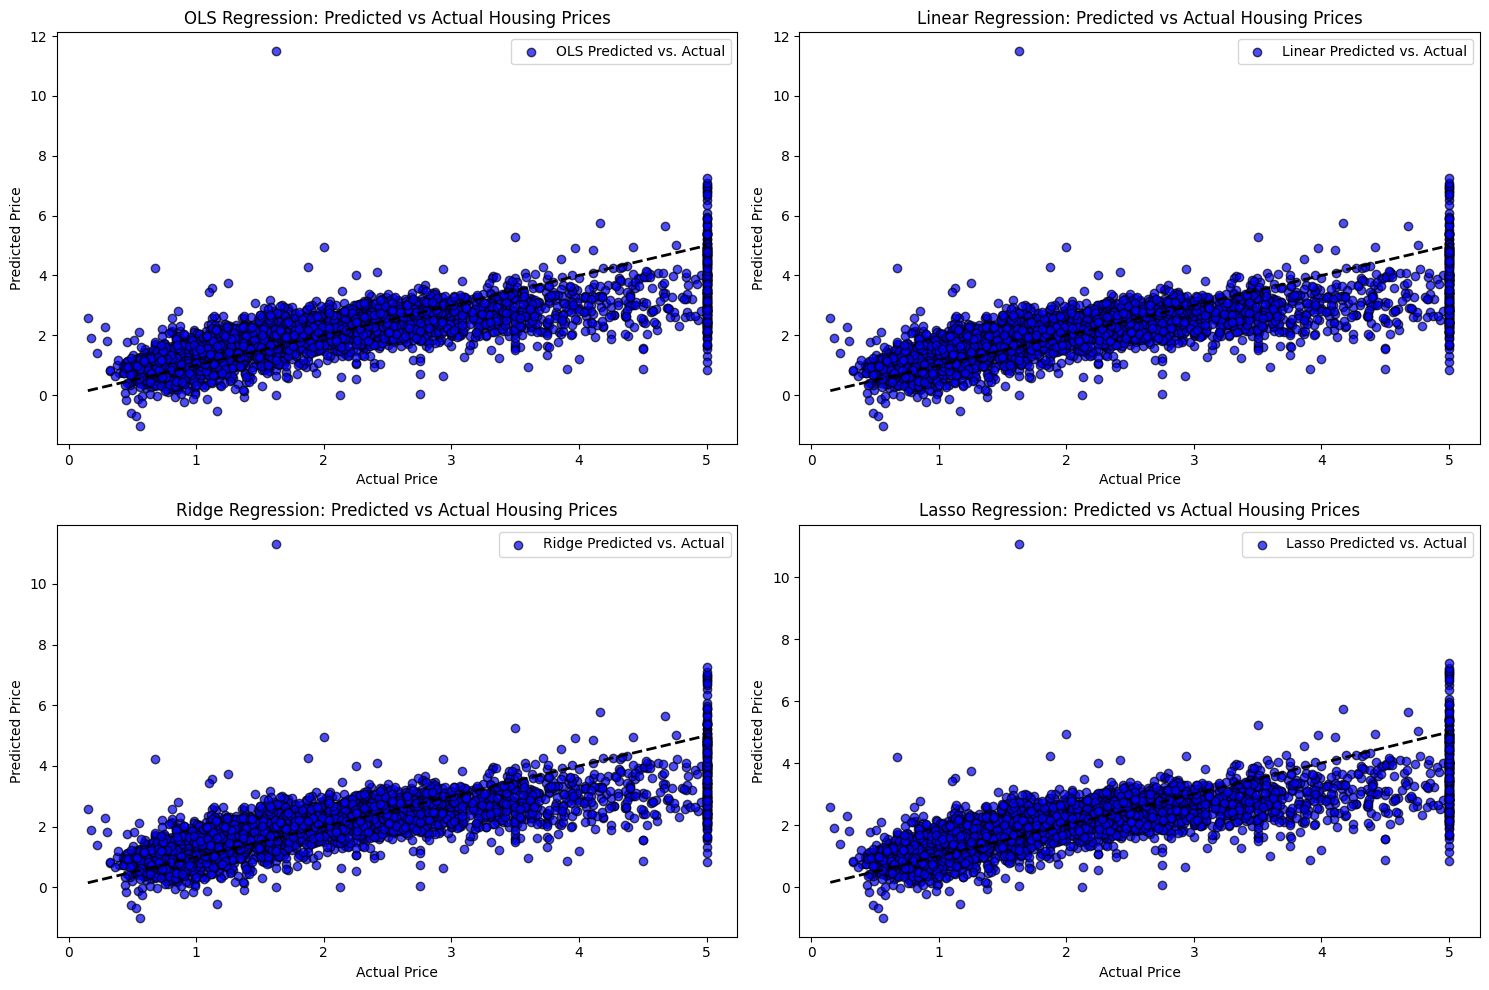

In [ ]:

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)


# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


# Multiple Regression with feature Scaling

OLS Regression R^2 score: 0.5758
OLS Regression MSE: 0.5559

Linear Regression R^2 score: 0.5758
Linear Regression MSE: 0.5559

Ridge Regression R^2 score: 0.5758
Ridge Regression MSE: 0.5559

Lasso Regression R^2 score: 0.5769
Lasso Regression MSE: 0.5545


OLS Regression Coefficients:
 [-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]

Linear Regression Coefficients:
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

Ridge Regression Coefficients:
 [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]

Lasso Regression Coefficients:
 [ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]


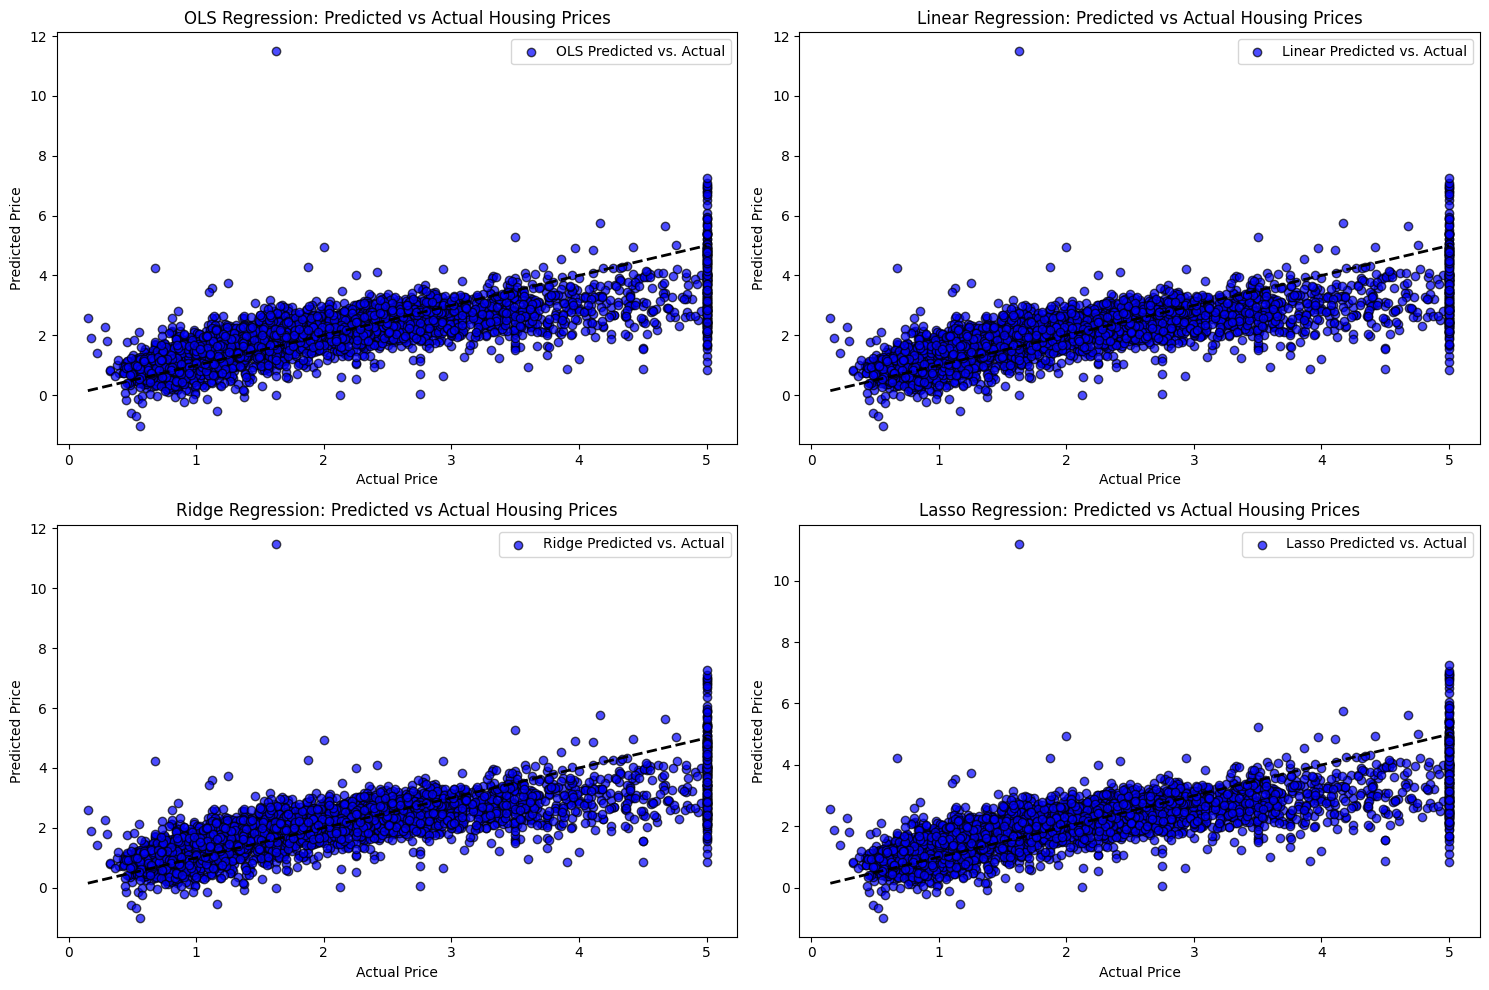

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Simple Linear Regression

Simple Linear Regression (MedInc only) R^2 score: 0.4589
Simple Linear Regression (MedInc only) MSE: 0.7091


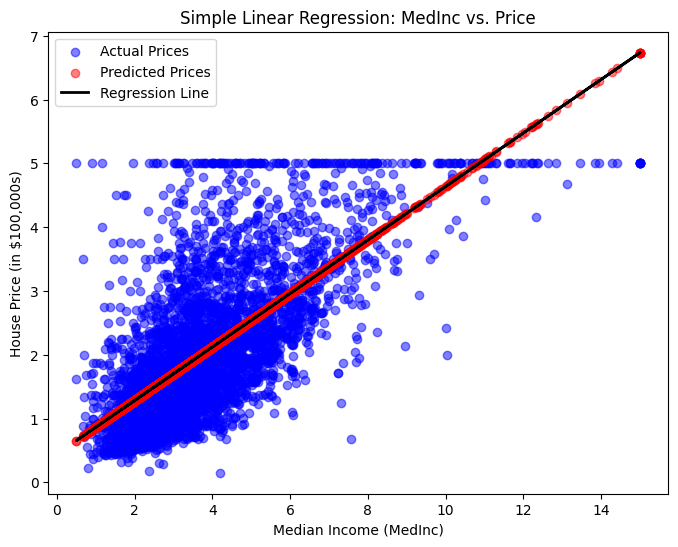

In [ ]:
#Implementing simple Linear Regression
# Extract only "MedInc" (Median Income)
X_medinc = X[:, np.newaxis, 0]  # Column 0 corresponds to MedInc
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_medinc, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict house prices
y_pred = linear_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Simple Linear Regression (MedInc only) R^2 score: {r2:.4f}")
print(f"Simple Linear Regression (MedInc only) MSE: {mse:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label="Predicted Prices")
plt.plot(X_test, y_pred, color='black', linewidth=2, label="Regression Line")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Price (in $100,000s)")
plt.title("Simple Linear Regression: MedInc vs. Price")
plt.legend()
plt.show()